In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
miehet = "020_11by_2017_miehet.xlsx"
naiset = "020_11by_2017_naiset.xlsx"
# http://pxnet2.stat.fi/PXWeb/pxweb/fi/StatFin/StatFin__ter__ksyyt/statfin_ksyyt_pxt_11by.px/

In [9]:
df_miehet = pd.read_excel(miehet, header = 4, index_col = 0)
df_naiset = pd.read_excel(naiset, header = 4, index_col = 0)

In [11]:
df_miehet

,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
- 14,4,4,2,3,3,1,2,1,3,5,...,2,0,1,2,0,1,1,5,2,2
15 - 19,15,16,20,20,28,27,37,25,27,41,...,22,27,30,34,30,20,20,15,13,24
20 - 24,48,34,33,72,63,88,80,127,117,116,...,59,62,75,55,55,48,43,44,46,48
25 - 29,36,38,42,55,54,60,78,68,91,105,...,54,60,59,54,50,67,61,49,51,62
30 - 34,34,26,34,40,46,41,54,59,51,73,...,62,61,60,51,41,64,49,43,48,58
35 - 39,36,34,30,27,42,38,47,42,52,72,...,69,51,50,43,48,41,37,41,51,44
40 - 44,31,21,27,37,36,37,42,34,44,56,...,70,68,51,51,57,49,46,36,42,52
45 - 49,27,29,39,43,38,38,44,31,36,43,...,97,87,78,72,70,47,65,58,61,38
50 - 54,23,31,30,27,35,39,31,51,41,54,...,95,87,62,93,60,57,59,55,62,48
55 - 59,24,14,14,24,29,19,33,22,46,42,...,82,79,74,72,69,78,43,57,54,45


Text(0.5, 0.98, 'Suicides in Finland')

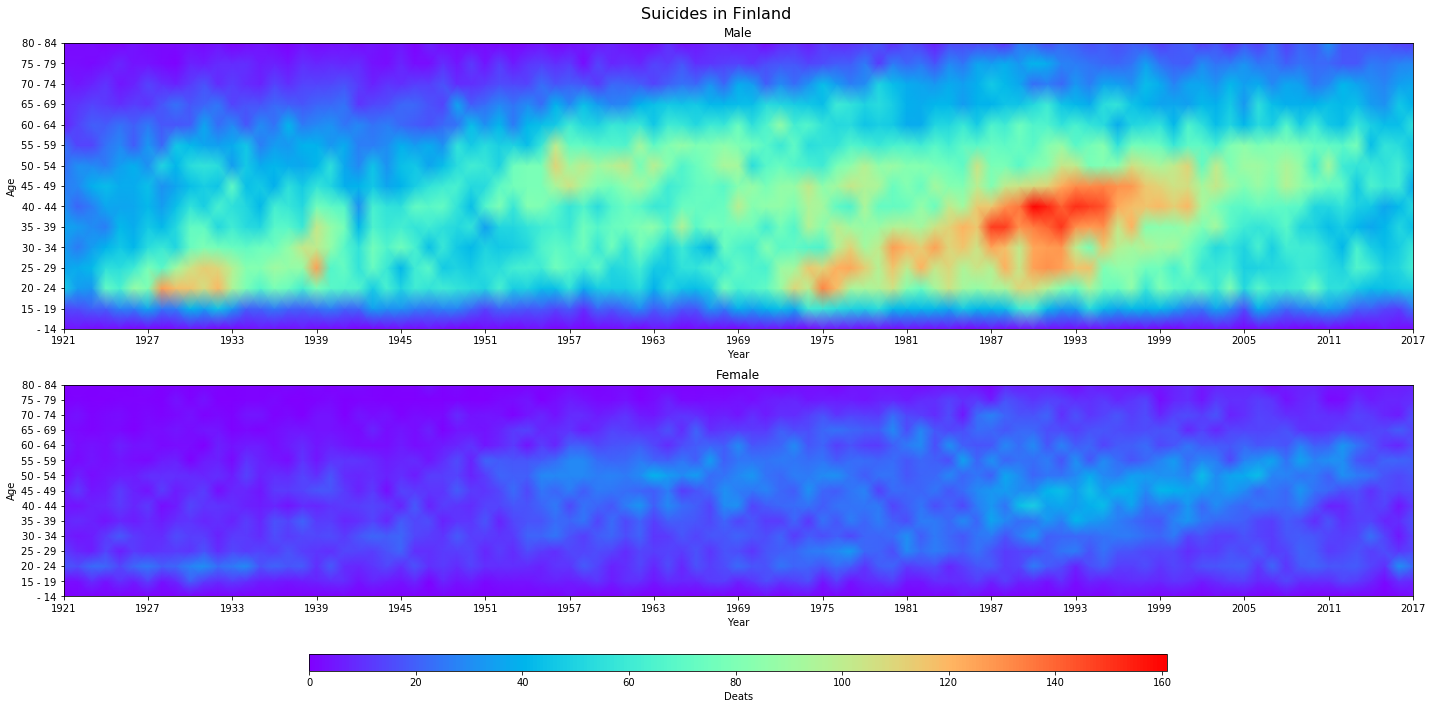

In [19]:
z_min = 0
z_max = df_miehet.max().max()
arange = np.arange(0,len(df_miehet.columns), 6)
fig, (plot_M, plot_N) = plt.subplots(2, 1, figsize=(20,10))
m = plot_M.pcolormesh(df_miehet, vmin=z_min, vmax=z_max, cmap='rainbow', shading='gouraud')
plot_M.set(xlabel='Year', ylabel='Age', title='Male')
plot_M.set_yticks(np.arange(len(df_miehet.index)))
plot_M.set_yticklabels(df_miehet.index)
plot_M.set_xticks(arange)
plot_M.set_xticklabels(df_miehet.columns[arange])
n = plot_N.pcolormesh(df_naiset, vmin=z_min, vmax=z_max, cmap='rainbow', shading='gouraud')
plot_N.set_yticks(np.arange(len(df_naiset.index)))
plot_N.set_yticklabels(df_naiset.index)
plot_N.set_xticks(arange)
plot_N.set_xticklabels(df_naiset.columns[arange])
fig.tight_layout()
plot_N.set(xlabel='Year', ylabel='Age', title='Female')
cbar = fig.colorbar(n ,orientation="horizontal", pad=0.2, aspect=50, fraction = 0.06)
cbar.set_label('Deats')
fig.tight_layout()
fig.subplots_adjust(top=0.93)
fig.suptitle('Suicides in Finland', fontsize=16)


In [1]:
miehet_n = "013_11rc_2018_miehet.xlsx"
naiset_n = "013_11rc_2018_naiset.xlsx"
## http://pxnet2.stat.fi/PXWeb/pxweb/fi/StatFin/StatFin__vrm__vaerak/statfin_vaerak_pxt_11rc.px/table/tableViewLayout1/

In [4]:
df_miehet_n = pd.read_excel(miehet_n, header = 4)
df_naiset_n = pd.read_excel(naiset_n, header = 4)

In [5]:
merge_age = ["- 4", "5 - 9", "10 - 14"]
df_miehet_n['Ika'].replace(merge_age, "- 14", inplace=True)
df_miehet_n = df_miehet_n.groupby('Ika').sum()
df_miehet_n = df_miehet_n.drop(df_miehet_n.index[-1])
df_miehet_n = df_miehet_n.drop('2018', axis=1)
df_naiset_n['Ika'].replace(merge_age, "- 14", inplace=True)
df_naiset_n = df_naiset_n.groupby('Ika').sum()
df_naiset_n = df_naiset_n.drop(df_naiset_n.index[-1])
df_naiset_n = df_naiset_n.drop('2018', axis=1)

In [11]:
divid = 10000
df_miehet_rate = df_miehet/(df_miehet_n / divid)
df_naiset_rate = df_naiset/(df_naiset_n / divid)

Text(0.5, 0.98, 'Suicide Rate in Finland')

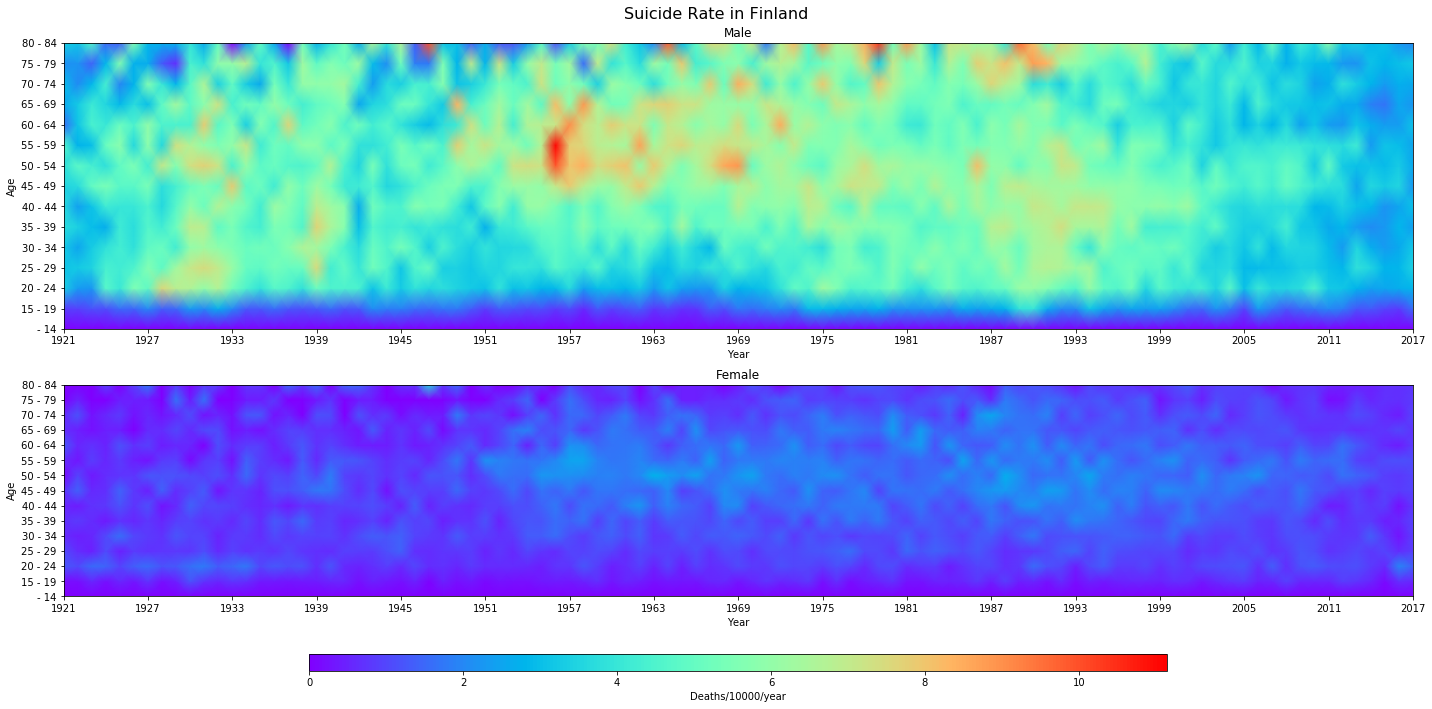

In [18]:
z_max_n = df_miehet_rate.max().max()
arange = np.arange(0,len(df_miehet_rate.columns), 6)
fig, (plot_M, plot_N) = plt.subplots(2, 1, figsize=(20,10))
m = plot_M.pcolormesh(df_miehet_rate, vmin=z_min, vmax=z_max_n, cmap='rainbow', shading='gouraud')
plot_M.set(xlabel='Year', ylabel='Age', title='Male')
plot_M.set_yticks(np.arange(len(df_miehet_rate.index)))
plot_M.set_yticklabels(df_miehet_rate.index)
plot_M.set_xticks(arange)
plot_M.set_xticklabels(df_miehet_rate.columns[arange])
n = plot_N.pcolormesh(df_naiset_rate, vmin=z_min, vmax=z_max_n, cmap='rainbow', shading='gouraud')
plot_N.set_yticks(np.arange(len(df_naiset_rate.index)))
plot_N.set_yticklabels(df_naiset_rate.index)
plot_N.set_xticks(arange)
plot_N.set_xticklabels(df_naiset_rate.columns[arange])
fig.tight_layout()
plot_N.set(xlabel='Year', ylabel='Age', title='Female')
cbar = fig.colorbar(n ,orientation="horizontal", pad=0.2, aspect=50, fraction = 0.06)
cbar.set_label('Deaths/' + str(divid) + '/year')
fig.tight_layout()
fig.subplots_adjust(top=0.93)
fig.suptitle('Suicide Rate in Finland', fontsize=16)